In [1]:
import numpy as np 
import pandas as pd                
import seaborn as sns              #visulazation
import matplotlib.pyplot as plt    #visulazation

from sklearn.preprocessing import LabelEncoder #label_Encoding
from sklearn.model_selection import train_test_split  #split_data
from sklearn.preprocessing import StandardScaler     #Standarizing
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
#print(sklearn.__version__)

In [3]:
data = pd.read_csv('dry_beans.csv')

In [4]:
df = data.copy() #a copy to save the original data 

In [5]:
df.head()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
df.shape

(13611, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
Bean ID            13611 non-null int64
Area               13611 non-null int64
Perimeter          13611 non-null float64
MajorAxisLength    13611 non-null float64
MinorAxisLength    13611 non-null float64
AspectRation       13611 non-null float64
Eccentricity       13611 non-null float64
ConvexArea         13611 non-null int64
EquivDiameter      13611 non-null float64
Extent             13611 non-null float64
Solidity           13611 non-null float64
roundness          13611 non-null float64
Compactness        13611 non-null float64
ShapeFactor1       13611 non-null float64
ShapeFactor2       13611 non-null float64
ShapeFactor3       13611 non-null float64
ShapeFactor4       13611 non-null float64
Class              13611 non-null object
dtypes: float64(14), int64(3), object(1)
memory usage: 1.9+ MB


In [8]:
df.isna().sum() # Find_missing_values

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
df.duplicated().value_counts() #Find_duplicates

False    13611
dtype: int64

In [10]:
df.describe()   #taking_insights_about_numerical_features

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,6806.000000,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3403.500000,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,6806.000000,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,10208.500000,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,13611.000000,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


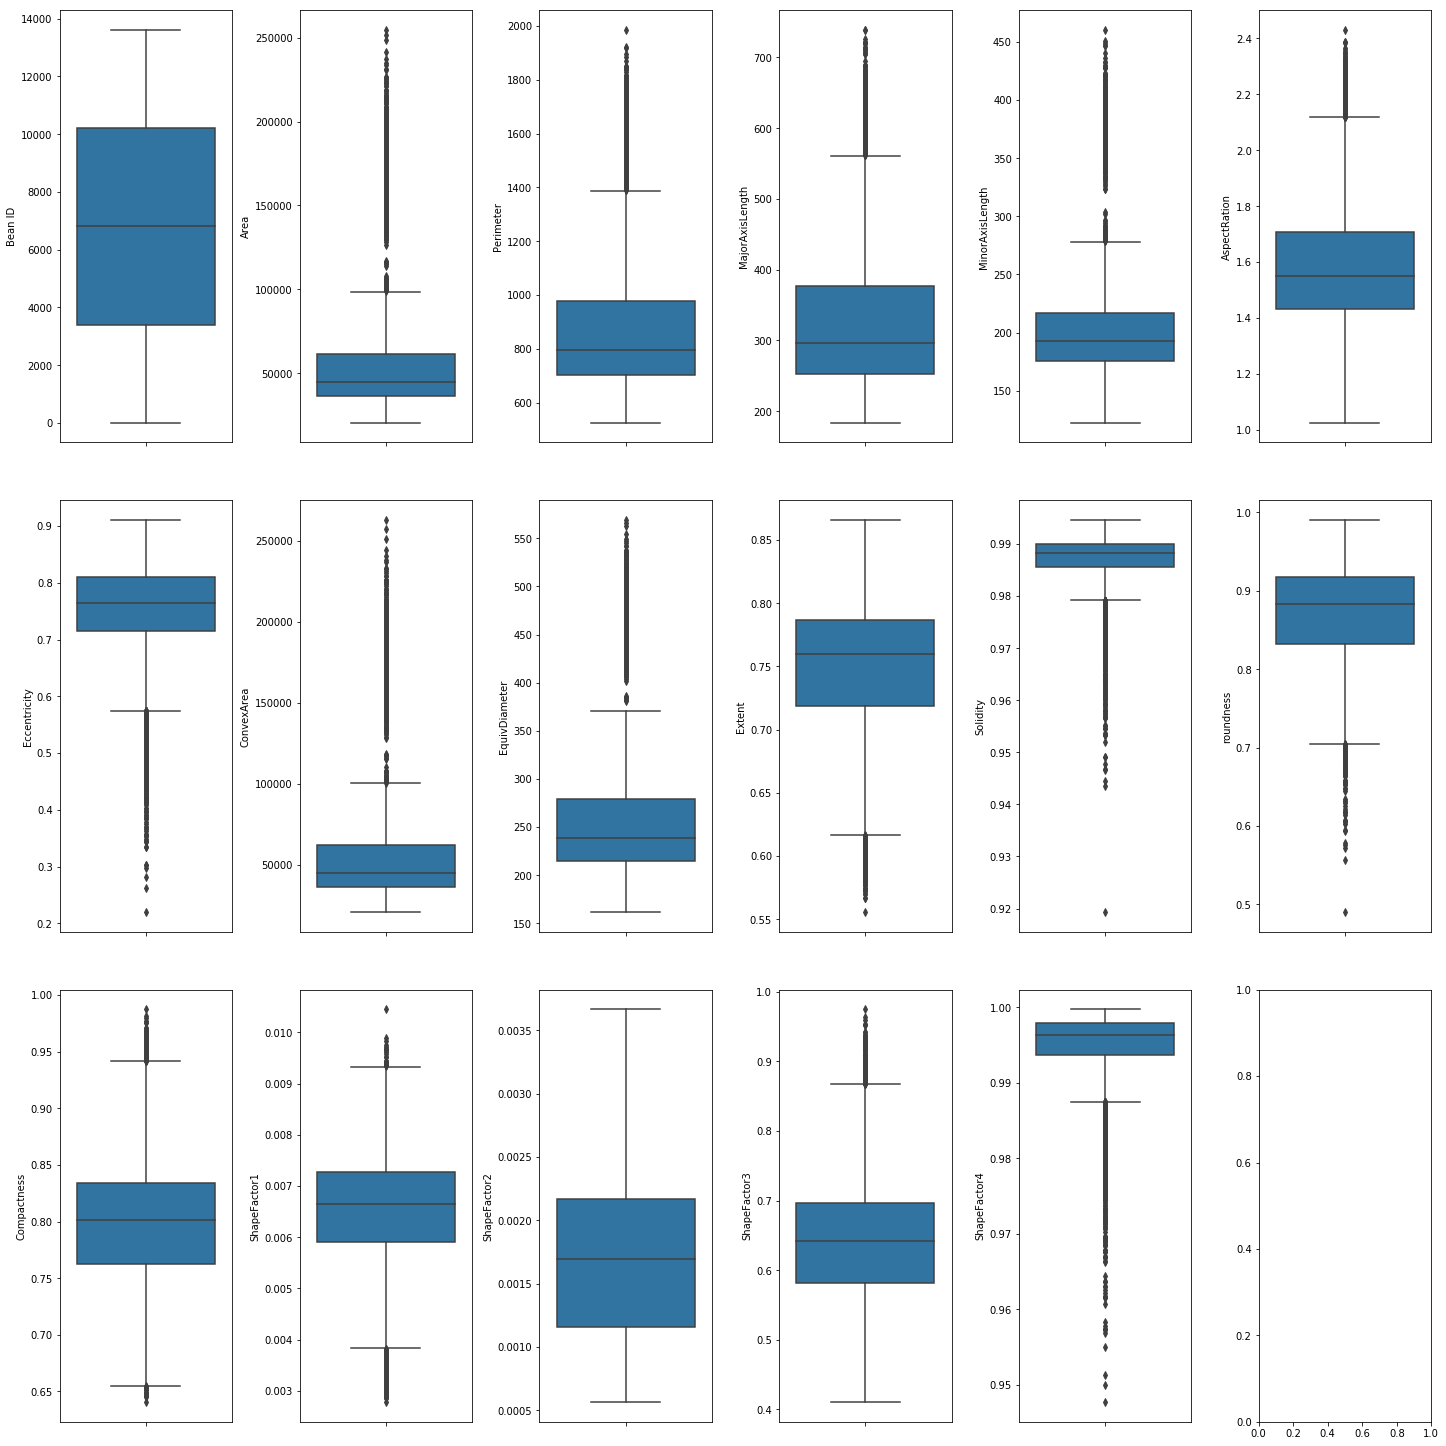

In [11]:
# Display boxplots per feature
fig, axs = plt.subplots(ncols = 6, nrows = 3, figsize = (20, 20))
idx = 0
axs = axs.flatten()
df1 = df.drop('Class',axis=1)
for k, v in df1.items():
    sns.boxplot(y = k, data = df1, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [12]:
def detect_and_fix_outliers(df, columns=None, fix=True):

    if columns is None:
        # Separate quantitative columns if not provided
        _, columns = separate_columns(df)
    
    for col in columns:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        if fix:
            # replace the outliers with the lower/upper bound with the median of the column
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Mark the outliers by adding new column to the dataframe with a postfix '_Outlier' and fill it with 1 for the rows that contain outliers.
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col+'_Outlier'] = 1
    return df


# Target Info

In [13]:
df['Class'].unique()  #class_values

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [14]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [15]:
df = df.drop('Bean ID',axis = 1)

There is 7 unique types of beans in "Class" Column 

BOMBAY occurs the least amount of times in dataset

DERMASON most often appears in our dataset

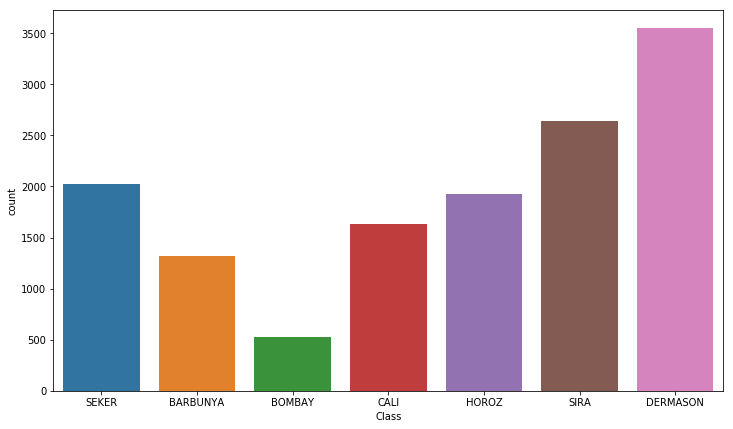

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

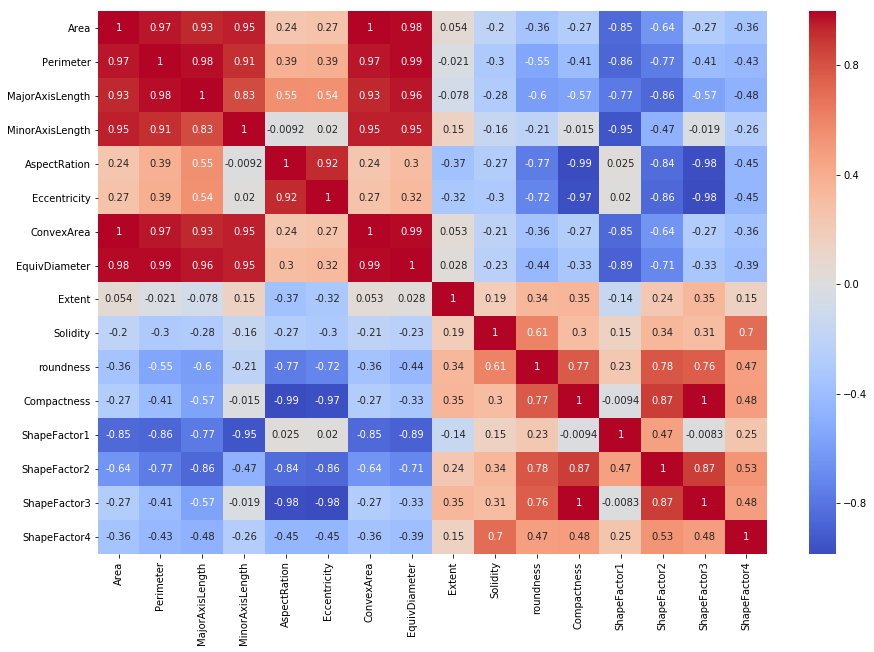

In [17]:
#correlation_Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

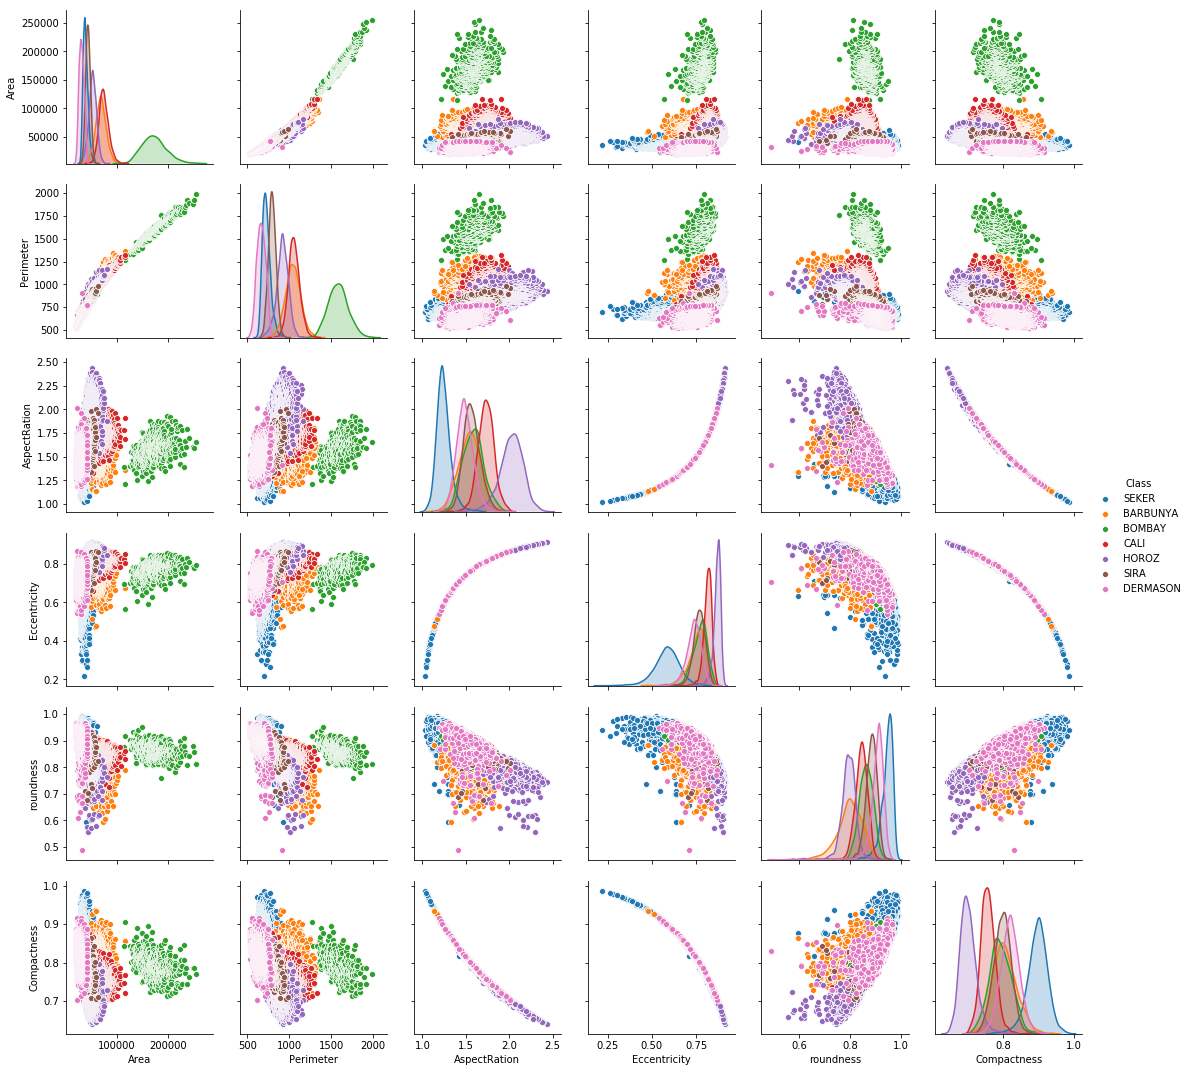

In [18]:
#Visualisation for 6 variable Scatterplot including Class labels
df11 = df[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","Class"]]
df11.head()
#sns.set_theme(style="whitegrid")
sns.pairplot(df11, hue="Class")

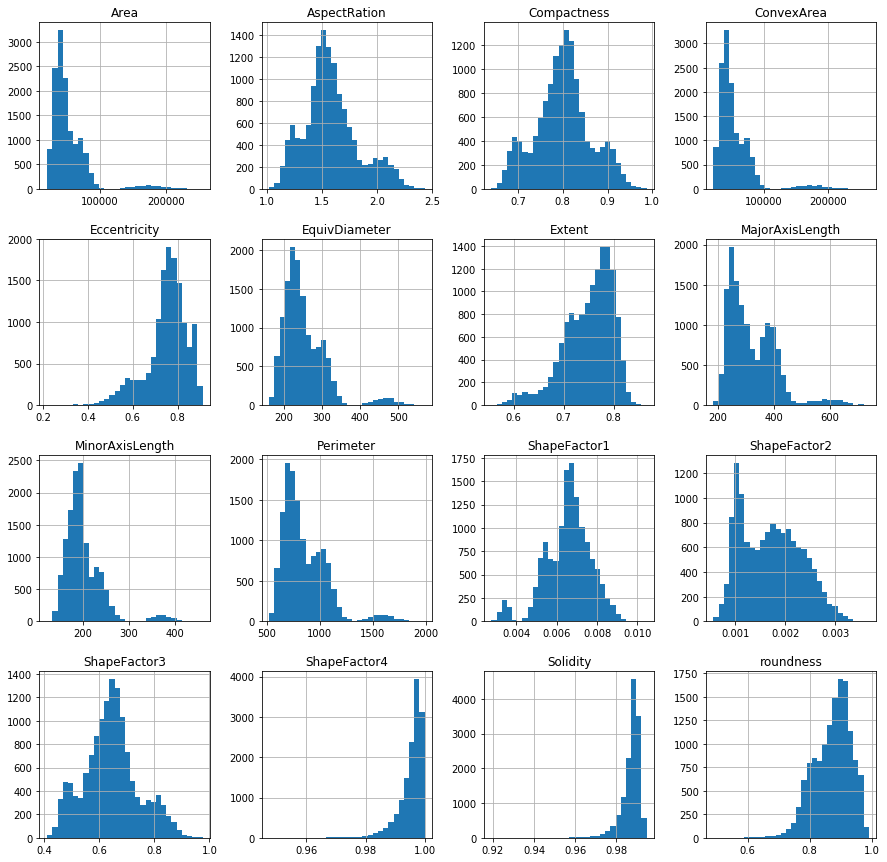

In [19]:
#Attributes_Histogram
df.hist(bins=30, figsize=(15,15))
plt.show()

# Feature Engineering

In [20]:
#label_Encoding
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [21]:
#split_data_into_features&target
X = df.drop(columns='Class')   # X is matrix 
y = df['Class']                # y is vector

In [22]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Implementing StandardScaler feature scaling
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

C:\Users\Ahmed Mohamed\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ahmed Mohamed\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Ahmed Mohamed\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


# Model Training

In [24]:
clf = GaussianNB()    # create a Gaussian Naive Bayes classifier

clf.fit(X_train, y_train)  # train the classifier on the training data

y_pred = clf.predict(X_test)  # make predictions on the testing data

In [25]:
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.75799
              precision    recall  f1-score   support

    BARBUNYA       0.60      0.46      0.52       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.65      0.76      0.70       317
    DERMASON       0.83      0.83      0.83       671
       HOROZ       0.79      0.80      0.80       408
       SEKER       0.70      0.69      0.70       413
        SIRA       0.76      0.79      0.77       536

   micro avg       0.76      0.76      0.76      2723
   macro avg       0.76      0.76      0.76      2723
weighted avg       0.76      0.76      0.76      2723



In [26]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)

array([[120,   0, 108,   0,  25,   0,   8],
       [  0, 117,   0,   0,   0,   0,   0],
       [ 63,   0, 242,   0,  11,   0,   1],
       [  0,   0,   0, 554,   0,  76,  41],
       [ 14,   0,  20,  11, 325,   0,  38],
       [  3,   0,   0,  78,   5, 285,  42],
       [  0,   0,   0,  26,  43,  46, 421]], dtype=int64)

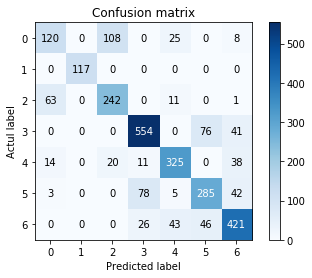

In [27]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       title='Confusion matrix',
       ylabel='Actul label',
       xlabel='Predicted label')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

###############################

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)    # create a KNN classifier with K=7

knn.fit(X_train, y_train)    # train the classifier on the training data

y_pred = knn.predict(X_test)  # make predictions on the testing data

In [29]:
#from sklearn.metrics import classification_report,accuracy_score
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.71686
              precision    recall  f1-score   support

    BARBUNYA       0.47      0.44      0.46       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.64      0.66      0.65       317
    DERMASON       0.78      0.88      0.83       671
       HOROZ       0.71      0.68      0.69       408
       SEKER       0.79      0.59      0.68       413
        SIRA       0.69      0.74      0.72       536

   micro avg       0.72      0.72      0.72      2723
   macro avg       0.73      0.71      0.72      2723
weighted avg       0.72      0.72      0.71      2723



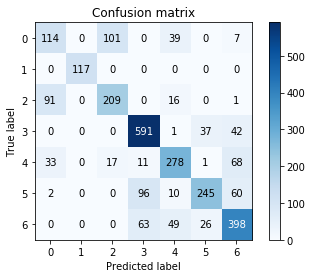

In [30]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")